In [2]:
import pandas
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
csv = pandas.read_csv('../Dados/steam_reviews_lemmatization.csv')
csv = csv[csv["recommendation"] == "Recommended"]
analise = "recomendadas"


#csv = csv[csv["recommendation"] == "Not Recommended"]
#analise = "não recomendadas"
#steam.shape

In [4]:
import ast
steam = csv
#steam["lemmatized"] = steam["lemmatized"].apply(lambda x: " ".join(x))
steam["lemmatized"] = steam["lemmatized"].apply(lambda x: " ".join(ast.literal_eval(x)))
team["lemmatized"].head(4)

In [ ]:
# 10 mais positivas
cl = steam.loc[steam.polaridade == 1, ['review']].sample(10).values
for c in cl:
    print(c[0])

In [ ]:
# 10 mais positivas
cl = steam.loc[steam.polaridade == 0, ['review']].sample(10).values
for c in cl:
    print(c[0])

In [ ]:
# 10 mais positivas
cl = steam.loc[steam.polaridade == -1, ['review']].sample(10).values
for c in cl:
    print(c[0])

In [ ]:
steam['polaridade'].iplot(
    kind='hist',
    bins=50,
    linecolor='black',
    yTitle='count',
    xTitle='polarity',
    title='Sentiment Polarity Distribution')

In [ ]:
'''
steam['recommendation'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')
'''
print()

In [ ]:
'''
steam['hour_played'].iplot(
    kind='hist',
    bins=50,
    xTitle='horas jogadas',
    linecolor='black',
    yTitle='count',
    title='distribuição por horas jogadas')
'''
print()

In [ ]:
'''
steam['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')
'''
print()

In [ ]:
'''
steam['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')
'''
print()

In [ ]:
'''

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(steam['lemmatized'], 20)
'''
print()

In [ ]:
'''
df2 = pandas.DataFrame(common_words, columns = ['lemmatized' , 'count'])
df2.groupby('lemmatized').sum()['count'].sort_values(ascending=False).iplot(
    kind='barh', xTitle='Count', linecolor='black', title='Top 20 words in review',
)
'''
print()

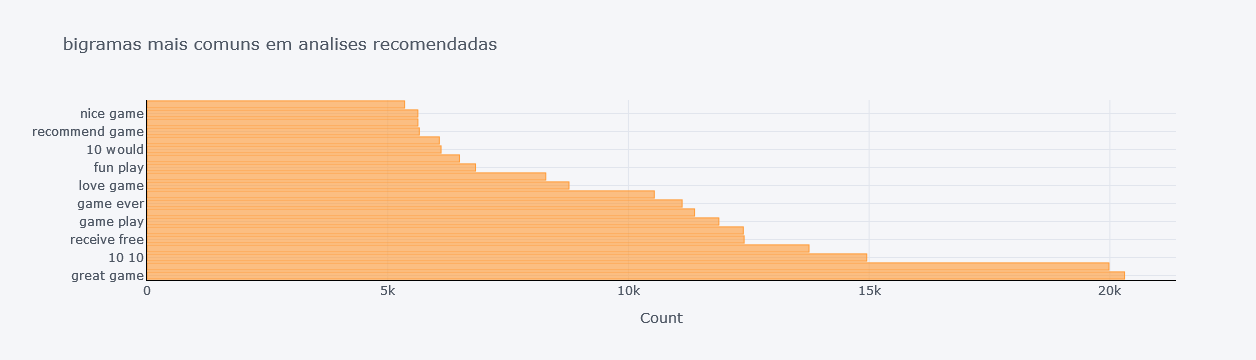

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(steam['lemmatized'], 20)
df4 = pandas.DataFrame(common_words, columns = ['lemmatized' , 'count'])
df4.groupby('lemmatized').sum()['count'].sort_values(ascending=False).iplot(
    kind='barh', xTitle='Count', linecolor='black', title=f'bigramas mais comuns em analises {analise}')

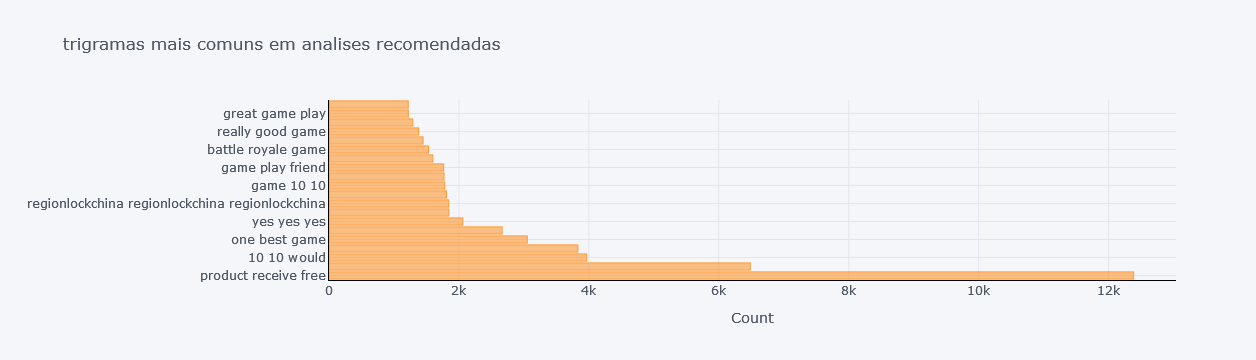

In [6]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(steam['lemmatized'], 20)
df6 = pandas.DataFrame(common_words, columns = ['lemmatized' , 'count'])
df6.groupby('lemmatized').sum()['count'].sort_values(ascending=False).iplot(
    kind='barh', xTitle='Count', linecolor='black', title=f'trigramas mais comuns em analises {analise}')

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
x1 = steam.loc[steam['recommendation'] == "Recommended", 'polaridade']
x0 = steam.loc[steam['recommendation'] == "Not Recommended", 'polaridade']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Recommendation')
fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig, filename='overlaid histogram')

In [ ]:
x1 = steam.loc[steam['recommendation'] == "Recommended", 'hour_played']
x0 = steam.loc[steam['recommendation'] == "Not Recommended", 'hour_played']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='horas jogadas por recomendação Recommendation')
fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig, filename='overlaid histogram')

In [ ]:
x1 = steam.loc[steam['recommendation'] == "Recommended", 'review_len']
x0 = steam.loc[steam['recommendation'] == "Not Recommended", 'review_len']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', title='Distribution of Review Lengths Based on Recommendation')
fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig, filename='stacked histogram')

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import numpy as np
reindexed_data = steam['lemmatized']
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
%%time
import math
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    print("quantidade de topicos")
    for topic in range(n_topics):
        temp_vector_sum = 0
        tamanho = len(keys)
        for i in range(tamanho):
            #print(tamanho % (math.ceil(1 / 15)+1))
            #if tamanho % (math.ceil(tamanho / 15)+1) == 0:
            #    print(f"{((100*i)/tamanho):.2f} quantidade de topicos")
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    atual = 0
    tamanho = len(top_word_indices)
    print("top palavras")
    for topic in top_word_indices:
        #atual += 1
        #if tamanho % math.ceil(tamanho / 15) == 0:
        #    print(f"{((100*atual)/len(top_word_indices)):.2f} top palavras")
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
    
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

In [ ]:
import matplotlib.pyplot as plt
#top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
print("cheguei")
labels = ['Topic {}: \n'.format(i) + top_n_words_lsa[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(lsa_categories,lsa_counts)
ax.set_yticks(lsa_categories)
ax.set_yticklabels(labels)
ax.set_ylabel('Number of review text')
ax.set_title('LSA topic counts')
plt.show()
#fig.savefig("../Dados/lsa_topics_counts")
fig.savefig("../Dados/n_recomendado_lsa_topics_counts")